# Understanding Multicollinearity in Linear Regression

This notebook demonstrates the effects of multicollinearity in linear regression through:
- Synthetic data generation with and without multicollinearity
- Visualization of correlations
- VIF (Variance Inflation Factor) analysis
- Model fitting and comparison
- Coefficient stability analysis using bootstrapping

Originally created by hilmi, adapted to Jupyter notebook format.

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample

# Set plot style for better aesthetics
sns.set(style="whitegrid")

# Seed for reproducibility
np.random.seed(0)

## 1. Generate Synthetic Data
We'll create two datasets:
1. Without multicollinearity: Independent predictors
2. With multicollinearity: Highly correlated predictors

In [2]:
# a. Without Multicollinearity (Independent Predictors)
n_samples = 100
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
y_no_multicol = 3 * X1 + 5 * X2 + np.random.normal(0, 1, n_samples)
data_no_multicol = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y_no_multicol})

# b. With Multicollinearity (Highly Correlated Predictors)
X1_mc = np.random.normal(0, 1, n_samples)
X2_mc = X1_mc + np.random.normal(0, 0.1, n_samples)  # X2 is X1 plus small noise
y_multicol = 3 * X1_mc + 5 * X2_mc + np.random.normal(0, 1, n_samples)
data_multicol = pd.DataFrame({'X1': X1_mc, 'X2': X2_mc, 'y': y_multicol})

## 2. Visualize Correlation Matrices
Let's compare the correlation matrices of both datasets to visualize the relationship between predictors.

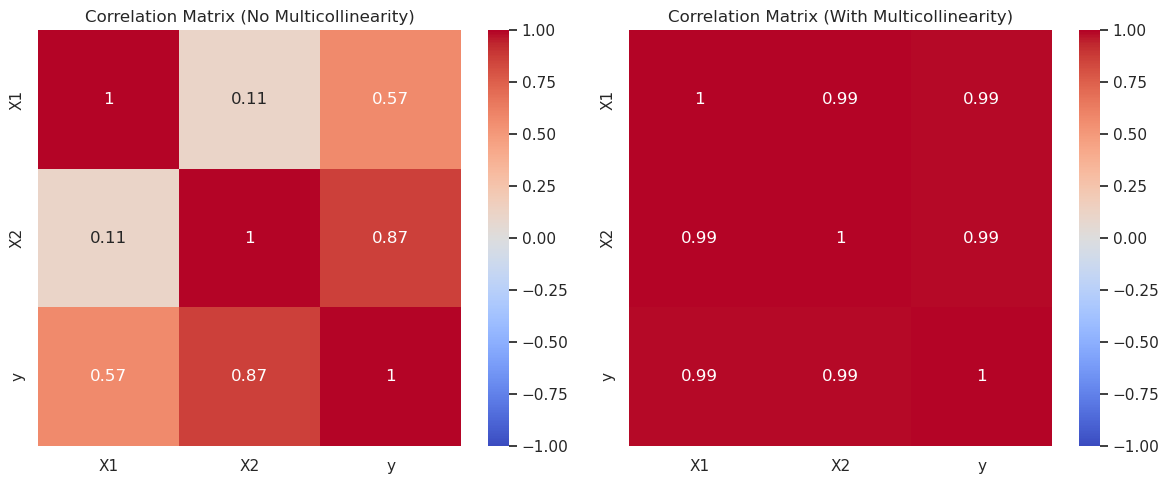

In [3]:
plt.figure(figsize=(12, 5))

# a. No Multicollinearity
plt.subplot(1, 2, 1)
sns.heatmap(data_no_multicol.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (No Multicollinearity)')

# b. With Multicollinearity
plt.subplot(1, 2, 2)
sns.heatmap(data_multicol.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (With Multicollinearity)')

plt.tight_layout()
plt.show()

## 3. Variance Inflation Factor (VIF) Analysis
VIF quantifies the severity of multicollinearity. A VIF value:
- = 1: Variables are uncorrelated
- 1-5: Moderate correlation
- > 5: High correlation (problematic)
- > 10: Severe multicollinearity

In [4]:
def calculate_vif(df):
    X = df[['X1', 'X2']]
    X = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data['Feature'] = ['const'] + ['X1', 'X2']
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# a. VIF Without Multicollinearity
vif_no_multicol = calculate_vif(data_no_multicol)
print("Variance Inflation Factor (No Multicollinearity):")
print(vif_no_multicol)

# b. VIF With Multicollinearity
vif_with_multicol = calculate_vif(data_multicol)
print("\nVariance Inflation Factor (With Multicollinearity):")
print(vif_with_multicol)

Variance Inflation Factor (No Multicollinearity):
  Feature       VIF
0   const  1.008864
1      X1  1.012641
2      X2  1.012641

Variance Inflation Factor (With Multicollinearity):
  Feature        VIF
0   const   1.045768
1      X1  80.342608
2      X2  80.342608


## 4. Fit Linear Regression Models
We'll fit models to both datasets using scikit-learn and statsmodels to compare the results.

In [5]:
# a. Without Multicollinearity
X_no_mc = data_no_multicol[['X1', 'X2']]
y_no_mc = data_no_multicol['y']

# Using scikit-learn
lr_no_mc = LinearRegression().fit(X_no_mc, y_no_mc)
y_pred_no_mc = lr_no_mc.predict(X_no_mc)
mse_no_mc = mean_squared_error(y_no_mc, y_pred_no_mc)

print("Linear Regression (No Multicollinearity) - scikit-learn:")
print(f"Coefficients: {lr_no_mc.coef_}")
print(f"Intercept: {lr_no_mc.intercept_}")
print(f"Mean Squared Error: {mse_no_mc:.4f}")

# Using statsmodels
X_sm_no_mc = sm.add_constant(X_no_mc)
model_no_mc = sm.OLS(y_no_mc, X_sm_no_mc).fit()
print("\nStatsmodels Summary (No Multicollinearity):")
print(model_no_mc.summary())

Linear Regression (No Multicollinearity) - scikit-learn:
Coefficients: [3.06681637 5.04428585]
Intercept: -0.06686042873373055
Mean Squared Error: 0.8990

Statsmodels Summary (No Multicollinearity):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2180.
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           2.42e-81
Time:                        18:11:36   Log-Likelihood:                -136.57
No. Observations:                 100   AIC:                             279.1
Df Residuals:                      97   BIC:                             287.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
           

In [6]:
# b. With Multicollinearity
X_mc = data_multicol[['X1', 'X2']]
y_mc = data_multicol['y']

# Using scikit-learn
lr_mc = LinearRegression().fit(X_mc, y_mc)
y_pred_mc = lr_mc.predict(X_mc)
mse_mc = mean_squared_error(y_mc, y_pred_mc)

print("Linear Regression (With Multicollinearity) - scikit-learn:")
print(f"Coefficients: {lr_mc.coef_}")
print(f"Intercept: {lr_mc.intercept_}")
print(f"Mean Squared Error: {mse_mc:.4f}")

# Using statsmodels
X_sm_mc = sm.add_constant(X_mc)
model_mc = sm.OLS(y_mc, X_sm_mc).fit()
print("\nStatsmodels Summary (With Multicollinearity):")
print(model_mc.summary())

Linear Regression (With Multicollinearity) - scikit-learn:
Coefficients: [2.1409707  6.14475051]
Intercept: -0.14526369793005922
Mean Squared Error: 0.9551

Statsmodels Summary (With Multicollinearity):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2989.
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           7.20e-88
Time:                        18:11:36   Log-Likelihood:                -139.59
No. Observations:                 100   AIC:                             285.2
Df Residuals:                      97   BIC:                             293.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
       

## 5. Condition Number Analysis
The condition number measures the numerical stability of the feature matrix. A high condition number indicates potential numerical problems.

In [7]:
def condition_number(df):
    X = df[['X1', 'X2']].values
    X = sm.add_constant(X)
    return np.linalg.cond(X)

cond_no_mc = condition_number(data_no_multicol)
cond_with_mc = condition_number(data_multicol)

print(f"Condition Number (No Multicollinearity): {cond_no_mc:.2f}")
print(f"Condition Number (With Multicollinearity): {cond_with_mc:.2f}")

Condition Number (No Multicollinearity): 1.15
Condition Number (With Multicollinearity): 18.72


## 6. Bootstrapping Analysis
We'll use bootstrapping to visualize the stability of coefficient estimates under both conditions.

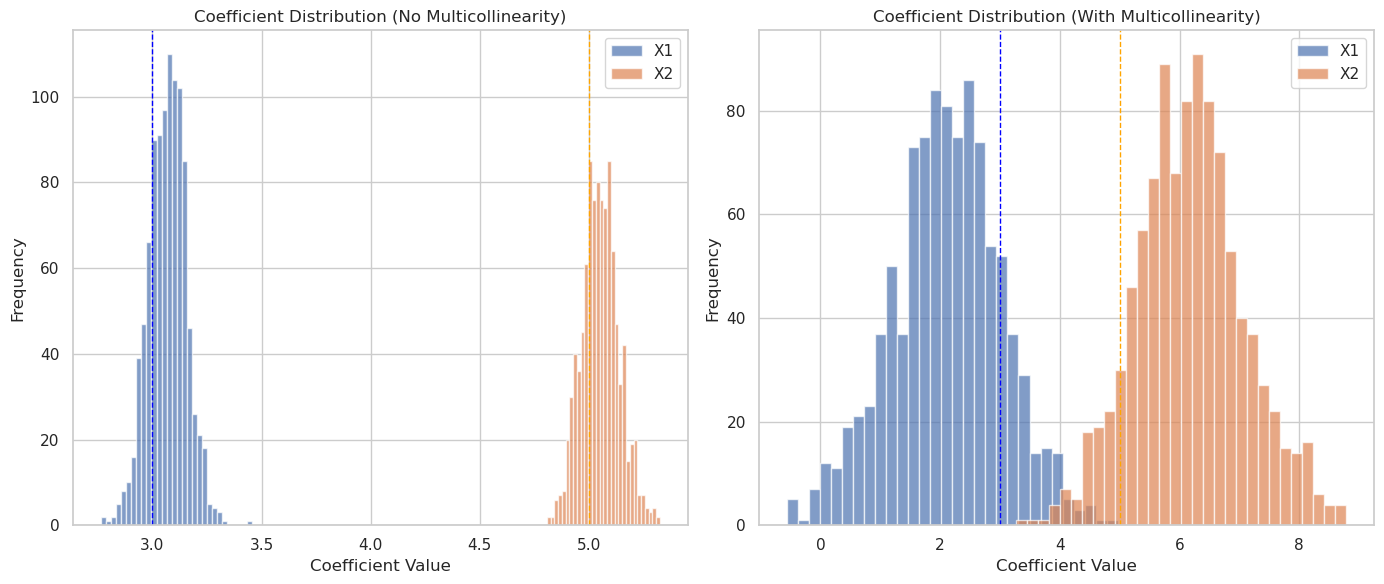

In [8]:
def bootstrap_coefficients(df, n_bootstrap=1000):
    X = df[['X1', 'X2']]
    y = df['y']
    coefs = []
    for _ in range(n_bootstrap):
        X_res, y_res = resample(X, y)
        lr = LinearRegression().fit(X_res, y_res)
        coefs.append(lr.coef_)
    return np.array(coefs)

# Bootstrap without multicollinearity
coefs_no_mc = bootstrap_coefficients(data_no_multicol)

# Bootstrap with multicollinearity
coefs_with_mc = bootstrap_coefficients(data_multicol)

# Plotting the Bootstrapped Coefficients
plt.figure(figsize=(14, 6))

# a. No Multicollinearity
plt.subplot(1, 2, 1)
plt.hist(coefs_no_mc[:, 0], bins=30, alpha=0.7, label='X1')
plt.hist(coefs_no_mc[:, 1], bins=30, alpha=0.7, label='X2')
plt.axvline(3, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(5, color='orange', linestyle='dashed', linewidth=1)
plt.title('Coefficient Distribution (No Multicollinearity)')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()

# b. With Multicollinearity
plt.subplot(1, 2, 2)
plt.hist(coefs_with_mc[:, 0], bins=30, alpha=0.7, label='X1')
plt.hist(coefs_with_mc[:, 1], bins=30, alpha=0.7, label='X2')
plt.axvline(3, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(5, color='orange', linestyle='dashed', linewidth=1)
plt.title('Coefficient Distribution (With Multicollinearity)')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## 7. Summary of Findings

1. **Correlation Matrix:**
   - **No Multicollinearity:** Low correlation between X1 and X2.
   - **With Multicollinearity:** High correlation between X1 and X2 (≈1).

2. **Variance Inflation Factor (VIF):**
   - **No Multicollinearity:** VIFs are close to 1, indicating no multicollinearity.
   - **With Multicollinearity:** VIFs are extremely high, indicating severe multicollinearity.

3. **Linear Regression Coefficients:**
   - **No Multicollinearity:** Coefficients are stable and close to true values (3 for X1 and 5 for X2) with low standard errors.
   - **With Multicollinearity:** Coefficients are unstable, may deviate from true values, and have high standard errors, making them statistically insignificant.

4. **Condition Number:**
   - **No Multicollinearity:** Low condition number (~1), indicating a well-conditioned matrix.
   - **With Multicollinearity:** High condition number (>100), indicating an ill-conditioned matrix and numerical instability.

5. **Bootstrapped Coefficient Distributions:**
   - **No Multicollinearity:** Coefficient estimates are tightly clustered around the true values.
   - **With Multicollinearity:** Coefficient estimates are widely dispersed, indicating high variability and unreliability.